In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import numpy as np

In [3]:
df = pd.read_csv("hallucinations_preprocessed_assigned_ls_norms.csv")

In [4]:
from scipy.stats import zscore

# Define predictor groups
sensory_dims = [
    "visual_strength", "auditory_strength", "gustatory_strength",
    "haptic_strength", "olfactory_strength", "interoceptive_strength"
]

motor_dims = [
    "head_strength", "hand_strength", "mouth_strength",
    "foot_strength", "torso_strength"
]

overall_dims = [
    "perceptual_strength", "action_strength", "sensorimotor_strength"
]

# Add description_length if needed
all_to_scale = sensory_dims + motor_dims + overall_dims + ["description_length"]

# Create scaled versions (z-scored)
for col in all_to_scale:
    df[f"{col}_scaled"] = zscore(df[col], nan_policy='omit')


In [5]:
# Define predictor groups
perceptual_order = [
    "perceptual_strength", "visual_strength", "auditory_strength", "interoceptive_strength",
    "haptic_strength", "olfactory_strength", "gustatory_strength"
]
motor_order = [
    "action_strength", "head_strength", "hand_strength",
    "foot_strength", "mouth_strength", "torso_strength"
]

ordered_predictors = perceptual_order + motor_order

# Convert to long format
df_long = df[ordered_predictors].melt(var_name="Predictor", value_name="Value")
df_long["Predictor"] = pd.Categorical(df_long["Predictor"], categories=ordered_predictors, ordered=True)

# Perceptual & motor base colors
perceptual_color = "#3F51B5"   # Indigo
motor_color = "#E64A19"        # Vermilion

# Lighter versions for subcomponents (with alpha ~0.4)
perceptual_light = "#3F51B566"
motor_light = "#E64A1966"

# Update color map: use solid color and alpha separately
alpha_map = {
    "perceptual_strength": 1.0,
    "visual_strength": 0.4,
    "auditory_strength": 0.4,
    "gustatory_strength": 0.4,
    "haptic_strength": 0.4,
    "olfactory_strength": 0.4,
    "interoceptive_strength": 0.4,
    "action_strength": 1.0,
    "head_strength": 0.4,
    "hand_strength": 0.4,
    "foot_strength": 0.4,
    "mouth_strength": 0.4,
    "torso_strength": 0.4
}

base_color_map = {
    "perceptual_strength": perceptual_color,
    "visual_strength": perceptual_color,
    "auditory_strength": perceptual_color,
    "gustatory_strength": perceptual_color,
    "haptic_strength": perceptual_color,
    "olfactory_strength": perceptual_color,
    "interoceptive_strength": perceptual_color,
    "action_strength": motor_color,
    "head_strength": motor_color,
    "hand_strength": motor_color,
    "foot_strength": motor_color,
    "mouth_strength": motor_color,
    "torso_strength": motor_color
}

/var/folders/4_/n1p8tswd39b0jr38l2pdhr4r0000gn/T/ipykernel_72493/2024043279.py:87: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


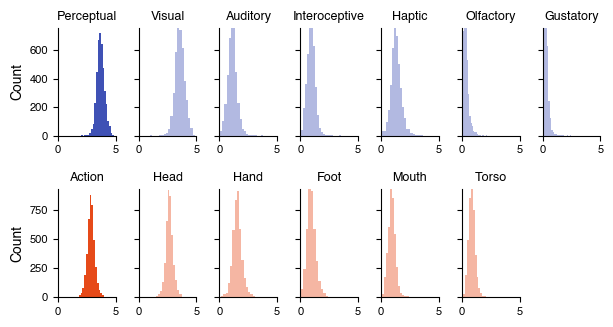

In [19]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import os

# Set Helvetica font
plt.rcParams['font.family'] = 'Helvetica'

# Begin plotting - adjusted for paper format
# For a complex multi-panel figure, we'll use 7 inches width but allow more height
fig = plt.figure(figsize=(7, 3.5))
gs = gridspec.GridSpec(2, max(len(perceptual_order), len(motor_order)), 
                       hspace=0.5, wspace=0.4)
axes = []

# Row 0: Perceptual - collect axes for y-axis sharing
perceptual_axes = []
for i, predictor in enumerate(perceptual_order):
    ax = fig.add_subplot(gs[0, i])
    sns.histplot(
        data=df_long[df_long["Predictor"] == predictor],
        x="Value", bins=20,
        color=base_color_map[predictor],
        edgecolor="none",  # Remove black edges for cleaner look
        alpha=alpha_map[predictor],
        ax=ax
    )
    # Clean title formatting
    ax.set_title(predictor.replace("_strength", "").replace("_", " ").title(), 
                fontsize=9)
    ax.set_xlabel("", fontsize=10)  # No x-label
    ax.set_ylabel("Count" if i == 0 else "", fontsize=10)  # Only first subplot gets y-label
    ax.tick_params(labelsize=8)
    ax.set_xlim(0, 5)  # Fixed x-axis range
    
    # Clean up spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    perceptual_axes.append(ax)
    axes.append(ax)

# Row 1: Motor - collect axes for y-axis sharing
motor_axes = []
for i, predictor in enumerate(motor_order):
    ax = fig.add_subplot(gs[1, i])
    sns.histplot(
        data=df_long[df_long["Predictor"] == predictor],
        x="Value", bins=20,
        color=base_color_map[predictor],
        edgecolor="none",  # Remove black edges for cleaner look
        alpha=alpha_map[predictor],
        ax=ax
    )
    ax.set_title(predictor.replace("_strength", "").replace("_", " ").title(), 
                fontsize=9)
    ax.set_xlabel("", fontsize=10)  # No x-label
    ax.set_ylabel("Count" if i == 0 else "", fontsize=10)  # Only first subplot gets y-label
    ax.tick_params(labelsize=8)
    ax.set_xlim(0, 5)  # Fixed x-axis range
    
    # Clean up spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    motor_axes.append(ax)
    axes.append(ax)

# Share y-axis within each row
if len(perceptual_axes) > 1:
    for ax in perceptual_axes[1:]:
        ax.sharey(perceptual_axes[0])
        ax.tick_params(labelleft=False)  # Hide y-axis labels for non-first subplots

if len(motor_axes) > 1:
    for ax in motor_axes[1:]:
        ax.sharey(motor_axes[0])
        ax.tick_params(labelleft=False)  # Hide y-axis labels for non-first subplots

# Ensure no grid lines
for ax in axes:
    ax.grid(False)

# Remove overall title for cleaner look
plt.suptitle("")

plt.tight_layout()

# Create the plots_paper directory if it doesn't exist
os.makedirs('plots_paper', exist_ok=True)

# Save the plot in high resolution suitable for publication
plt.savefig('plots_paper/multi_panel_histograms.png', 
           dpi=300, 
           bbox_inches='tight', 
           facecolor='white',
           edgecolor='none')

# Optionally save as PDF for vector graphics
plt.savefig('plots_paper/multi_panel_histograms.pdf', 
           bbox_inches='tight', 
           facecolor='white',
           edgecolor='none')

plt.show()

/var/folders/4_/n1p8tswd39b0jr38l2pdhr4r0000gn/T/ipykernel_72493/4119259254.py:39: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: pd.Series({
/var/folders/4_/n1p8tswd39b0jr38l2pdhr4r0000gn/T/ipykernel_72493/4119259254.py:78: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for ax, (name, subdata) in zip(g.axes.flat, df_sensory_summary.groupby("sensory_dimension")):


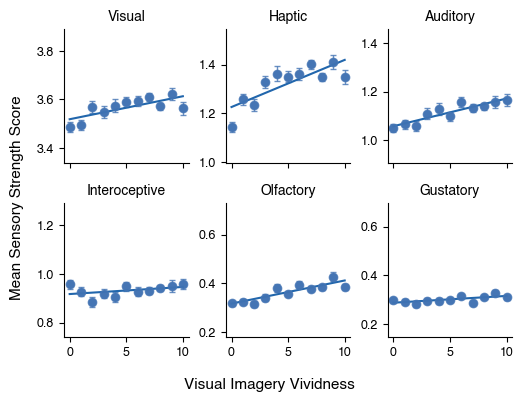

In [24]:
from pandas.api.types import CategoricalDtype

# Set Helvetica font
plt.rcParams['font.family'] = 'Helvetica'

# Melt dataframe
df_sensory_long = df.melt(
    id_vars="visual_vividness",
    value_vars=sensory_dims,
    var_name="sensory_dimension",
    value_name="strength_score"
)

# Clean up dimension names
dimension_labels = {
    "visual_strength": "Visual",
    "auditory_strength": "Auditory",
    "gustatory_strength": "Gustatory",
    "haptic_strength": "Haptic",
    "olfactory_strength": "Olfactory",
    "interoceptive_strength": "Interoceptive"
}
df_sensory_long["sensory_dimension"] = df_sensory_long["sensory_dimension"].map(dimension_labels)

# Compute summary stats
df_sensory_summary = (
    df_sensory_long
    .groupby(["visual_vividness", "sensory_dimension"], as_index=False)
    .agg(
        mean_strength=("strength_score", "mean"),
        se_strength=("strength_score", lambda x: np.std(x, ddof=1) / np.sqrt(len(x)))
    )
)

# Compute y_min and y_max manually
y_limits = (
    df_sensory_summary
    .groupby("sensory_dimension", as_index=False)
    .apply(lambda g: pd.Series({
        "y_min": (g["mean_strength"] - g["se_strength"]).min() - 0.1,
        "y_max": (g["mean_strength"] - g["se_strength"]).min() + 0.4
    }))
    .reset_index(drop=True)
)

df_sensory_summary = df_sensory_summary.merge(y_limits, on="sensory_dimension", how="left")

# Define desired order
ordered_dims = ["Visual", "Haptic", "Auditory", "Interoceptive", "Olfactory", "Gustatory"]
cat_type = CategoricalDtype(categories=ordered_dims, ordered=True)

# Apply ordered category
df_sensory_summary["sensory_dimension"] = df_sensory_summary["sensory_dimension"].astype(cat_type)

# === PLOT === Formatted for scientific paper
g = sns.FacetGrid(
    df_sensory_summary,
    col="sensory_dimension",
    col_wrap=3,
    sharey=False,
    height=2,  # Smaller height for paper format
    aspect=0.9   
)

# Add invisible points to force axis limits
g.map_dataframe(lambda data, color: plt.scatter(data["visual_vividness"], data["y_min"], alpha=0))
g.map_dataframe(lambda data, color: plt.scatter(data["visual_vividness"], data["y_max"], alpha=0))

g.map_dataframe(
    sns.scatterplot,
    x="visual_vividness",
    y="mean_strength",
    color="#4575b4",  # Scientific publication color
    s=40,  # Smaller markers for paper format
)

# Add custom error bars and regression lines manually
for ax, (name, subdata) in zip(g.axes.flat, df_sensory_summary.groupby("sensory_dimension")):
    for _, row in subdata.iterrows():
        ax.errorbar(
            x=row["visual_vividness"],
            y=row["mean_strength"],
            yerr=row["se_strength"],
            fmt='o',
            color="#4575b4",
            alpha=0.8,
            capsize=2,  # Small cap size
            capthick=1,
            elinewidth=1
        )
    
    # Fit and plot linear regression
    x = subdata["visual_vividness"]
    y = subdata["mean_strength"]
    if len(x.unique()) > 1:
        coeffs = np.polyfit(x, y, 1)
        x_vals = np.linspace(x.min(), x.max(), 100)
        y_vals = np.polyval(coeffs, x_vals)
        ax.plot(x_vals, y_vals, color="#2166ac", linewidth=1.5)
    
    # Clean up spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Styling with paper-appropriate font sizes
g.set_titles(col_template="{col_name}", size=10)  # Smaller titles
g.set_axis_labels("Visual Imagery Vividness", "Mean Sensory Strength Score")

# Remove individual x-axis labels
g.set_xlabels("")  # removes per-facet x-axis titles
g.set_ylabels("")  # remove per-facet y labels

# Add shared axis labels with smaller fonts
g.fig.text(0.5, 0.02, "Visual Imagery Vividness", ha='center', fontsize=11)
g.fig.text(0.02, 0.5, "Mean Sensory Strength Score", va='center', rotation='vertical', fontsize=11)

# Smaller tick labels
for ax in g.axes.flat:
    ax.tick_params(labelsize=9)
    ax.grid(False)

plt.subplots_adjust(top=0.92, bottom=0.15, left=0.12, right=0.95, hspace=0.3, wspace=0.3)
g.fig.suptitle("")

# Create the plots_paper directory if it doesn't exist
os.makedirs('plots_paper', exist_ok=True)

# Save the plot in high resolution suitable for publication
plt.savefig('plots_paper/sensory_dimensions_plot.png', 
           dpi=300, 
           bbox_inches='tight', 
           facecolor='white',
           edgecolor='none')

# Optionally save as PDF for vector graphics
plt.savefig('plots_paper/sensory_dimensions_plot.pdf', 
           bbox_inches='tight', 
           facecolor='white',
           edgecolor='none')

plt.show()

/var/folders/4_/n1p8tswd39b0jr38l2pdhr4r0000gn/T/ipykernel_72493/186752309.py:43: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: pd.Series({
/var/folders/4_/n1p8tswd39b0jr38l2pdhr4r0000gn/T/ipykernel_72493/186752309.py:82: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for ax, (name, subdata) in zip(g.axes.flat, df_motor_summary.groupby("motor_dimension")):


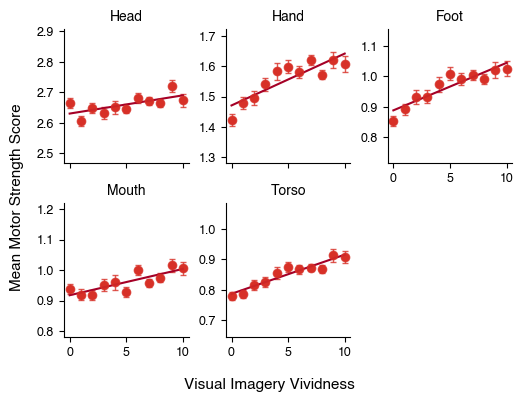

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import os

# Set Helvetica font
plt.rcParams['font.family'] = 'Helvetica'

# Melt dataframe for motor dimensions
df_motor_long = df.melt(
    id_vars="visual_vividness",
    value_vars=motor_dims,
    var_name="motor_dimension",
    value_name="strength_score"
)

# Clean up dimension names
motor_labels = {
    "head_strength": "Head",
    "hand_strength": "Hand",
    "foot_strength": "Foot",
    "mouth_strength": "Mouth",
    "torso_strength": "Torso"
}
df_motor_long["motor_dimension"] = df_motor_long["motor_dimension"].map(motor_labels)

# Compute summary stats
df_motor_summary = (
    df_motor_long
    .groupby(["visual_vividness", "motor_dimension"], as_index=False)
    .agg(
        mean_strength=("strength_score", "mean"),
        se_strength=("strength_score", lambda x: np.std(x, ddof=1) / np.sqrt(len(x)))
    )
)

# Compute y_min and y_max manually
y_limits_motor = (
    df_motor_summary
    .groupby("motor_dimension", as_index=False)
    .apply(lambda g: pd.Series({
        "y_min": (g["mean_strength"] - g["se_strength"]).min() - 0.1,
        "y_max": (g["mean_strength"] - g["se_strength"]).min() + 0.3
    }))
    .reset_index(drop=True)
)

# Merge limits back in
df_motor_summary = df_motor_summary.merge(y_limits_motor, on="motor_dimension", how="left")

# Define desired order
ordered_motor = ["Head", "Hand", "Foot", "Mouth", "Torso"]
cat_motor_type = CategoricalDtype(categories=ordered_motor, ordered=True)
df_motor_summary["motor_dimension"] = df_motor_summary["motor_dimension"].astype(cat_motor_type)

# === PLOT === Formatted for scientific paper
g = sns.FacetGrid(
    df_motor_summary,
    col="motor_dimension",
    col_wrap=3,
    sharey=False,
    height=2,  # Smaller height for paper format
    aspect=0.9   # Adjusted aspect ratio
)

# Add invisible points to force axis limits
g.map_dataframe(lambda data, color: plt.scatter(data["visual_vividness"], data["y_min"], alpha=0))
g.map_dataframe(lambda data, color: plt.scatter(data["visual_vividness"], data["y_max"], alpha=0))

# Add unconnected mean points with paper-appropriate styling
g.map_dataframe(
    sns.scatterplot,
    x="visual_vividness",
    y="mean_strength",
    color="#d73027",  # Scientific publication red
    s=40  # Smaller markers for paper format
)

# Add custom error bars and regression lines
for ax, (name, subdata) in zip(g.axes.flat, df_motor_summary.groupby("motor_dimension")):
    for _, row in subdata.iterrows():
        ax.errorbar(
            x=row["visual_vividness"],
            y=row["mean_strength"],
            yerr=row["se_strength"],
            fmt='o',
            color="#d73027",
            alpha=0.8,
            capsize=2,  # Small cap size
            capthick=1,
            elinewidth=1
        )
    
    # Fit and plot regression line
    x = subdata["visual_vividness"]
    y = subdata["mean_strength"]
    if len(x.unique()) > 1:
        coeffs = np.polyfit(x, y, 1)
        x_vals = np.linspace(x.min(), x.max(), 100)
        y_vals = np.polyval(coeffs, x_vals)
        ax.plot(x_vals, y_vals, color="#a50026", linewidth=1.5)
    
    # Clean up spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Styling with paper-appropriate font sizes
g.set_titles(col_template="{col_name}", size=10)  # Smaller titles
g.set_xlabels("")  # remove per-facet x labels
g.set_ylabels("")  # remove per-facet y labels

# Shared axis labels with smaller fonts
g.fig.text(0.5, 0.02, "Visual Imagery Vividness", ha='center', fontsize=11)
g.fig.text(0.02, 0.5, "Mean Motor Strength Score", va='center', rotation='vertical', fontsize=11)

# Format ticks with smaller font
for ax in g.axes.flat:
    ax.tick_params(labelsize=9)
    ax.grid(False)

# Layout adjusted for paper format
plt.subplots_adjust(top=0.92, bottom=0.15, left=0.12, right=0.95, hspace=0.3, wspace=0.3)
g.fig.suptitle("")  # no top title

# Create the plots_paper directory if it doesn't exist
os.makedirs('plots_paper', exist_ok=True)

# Save the plot in high resolution suitable for publication
plt.savefig('plots_paper/motor_dimensions_plot.png', 
           dpi=300, 
           bbox_inches='tight', 
           facecolor='white',
           edgecolor='none')

# Optionally save as PDF for vector graphics
plt.savefig('plots_paper/motor_dimensions_plot.pdf', 
           bbox_inches='tight', 
           facecolor='white',
           edgecolor='none')

plt.show()

/var/folders/4_/n1p8tswd39b0jr38l2pdhr4r0000gn/T/ipykernel_72493/2672434929.py:67: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: pd.Series({
/var/folders/4_/n1p8tswd39b0jr38l2pdhr4r0000gn/T/ipykernel_72493/2672434929.py:114: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for ax, (name, subdata) in zip(g.axes.flat, df_combined_summary.groupby("dimension")):


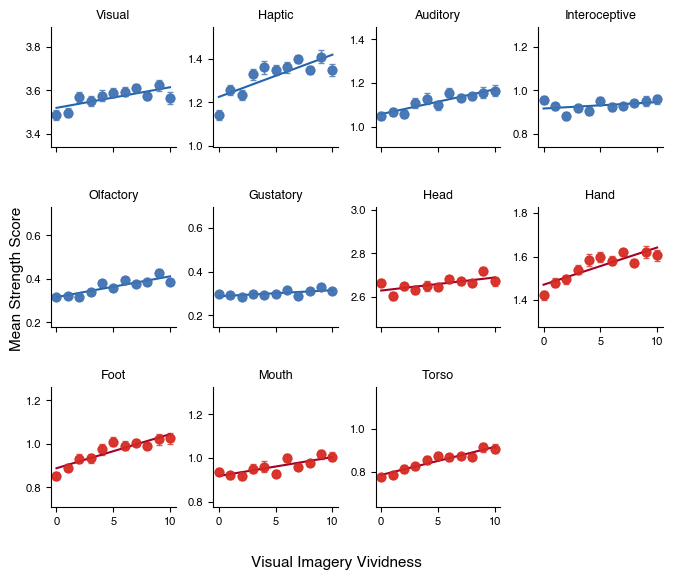

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import os

# Set Helvetica font
plt.rcParams['font.family'] = 'Helvetica'

# === PREPARE SENSORY DATA ===
df_sensory_long = df.melt(
    id_vars="visual_vividness",
    value_vars=sensory_dims,
    var_name="dimension",
    value_name="strength_score"
)

# Clean up sensory dimension names
sensory_labels = {
    "visual_strength": "Visual",
    "auditory_strength": "Auditory",
    "gustatory_strength": "Gustatory",
    "haptic_strength": "Haptic",
    "olfactory_strength": "Olfactory",
    "interoceptive_strength": "Interoceptive"
}
df_sensory_long["dimension"] = df_sensory_long["dimension"].map(sensory_labels)
df_sensory_long["dimension_type"] = "Sensory"

# === PREPARE MOTOR DATA ===
df_motor_long = df.melt(
    id_vars="visual_vividness",
    value_vars=motor_dims,
    var_name="dimension",
    value_name="strength_score"
)

# Clean up motor dimension names
motor_labels = {
    "head_strength": "Head",
    "hand_strength": "Hand",
    "foot_strength": "Foot",
    "mouth_strength": "Mouth",
    "torso_strength": "Torso"
}
df_motor_long["dimension"] = df_motor_long["dimension"].map(motor_labels)
df_motor_long["dimension_type"] = "Motor"

# === COMBINE DATA ===
df_combined_long = pd.concat([df_sensory_long, df_motor_long], ignore_index=True)

# Compute summary stats
df_combined_summary = (
    df_combined_long
    .groupby(["visual_vividness", "dimension", "dimension_type"], as_index=False)
    .agg(
        mean_strength=("strength_score", "mean"),
        se_strength=("strength_score", lambda x: np.std(x, ddof=1) / np.sqrt(len(x)))
    )
)

# Compute y_min and y_max manually
y_limits_combined = (
    df_combined_summary
    .groupby("dimension", as_index=False)
    .apply(lambda g: pd.Series({
        "y_min": (g["mean_strength"] - g["se_strength"]).min() - 0.1,
        "y_max": (g["mean_strength"] - g["se_strength"]).min() + 0.4
    }))
    .reset_index(drop=True)
)

# Merge limits back in
df_combined_summary = df_combined_summary.merge(y_limits_combined, on="dimension", how="left")

# Define desired order - sensory first, then motor
ordered_dimensions = ["Visual", "Haptic", "Auditory", "Interoceptive", "Olfactory", "Gustatory",
                     "Head", "Hand", "Foot", "Mouth", "Torso"]
cat_dimension_type = CategoricalDtype(categories=ordered_dimensions, ordered=True)
df_combined_summary["dimension"] = df_combined_summary["dimension"].astype(cat_dimension_type)

# === PLOT === Combined sensory and motor
g = sns.FacetGrid(
    df_combined_summary,
    col="dimension",
    col_wrap=4,  # 4 columns to accommodate 11 dimensions
    sharey=False,
    height=2.0,  # Slightly smaller for more dimensions
    aspect=0.85
)

# Add invisible points to force axis limits
g.map_dataframe(lambda data, color: plt.scatter(data["visual_vividness"], data["y_min"], alpha=0))
g.map_dataframe(lambda data, color: plt.scatter(data["visual_vividness"], data["y_max"], alpha=0))

# Color mapping based on dimension type
def plot_points_with_colors(data, **kwargs):
    sensory_mask = data["dimension_type"] == "Sensory"
    motor_mask = data["dimension_type"] == "Motor"
    
    if sensory_mask.any():
        plt.scatter(data[sensory_mask]["visual_vividness"], 
                   data[sensory_mask]["mean_strength"],
                   color="#4575b4", s=40, alpha=0.8)
    if motor_mask.any():
        plt.scatter(data[motor_mask]["visual_vividness"], 
                   data[motor_mask]["mean_strength"],
                   color="#d73027", s=40, alpha=0.8)

g.map_dataframe(plot_points_with_colors)

# Add custom error bars and regression lines
for ax, (name, subdata) in zip(g.axes.flat, df_combined_summary.groupby("dimension")):
    # Determine color based on dimension type
    if subdata["dimension_type"].iloc[0] == "Sensory":
        point_color = "#4575b4"
        line_color = "#2166ac"
    else:  # Motor
        point_color = "#d73027"
        line_color = "#a50026"
    
    # Add error bars
    for _, row in subdata.iterrows():
        ax.errorbar(
            x=row["visual_vividness"],
            y=row["mean_strength"],
            yerr=row["se_strength"],
            fmt='o',
            color=point_color,
            alpha=0.8,
            capsize=2,
            capthick=1,
            elinewidth=1
        )
    
    # Fit and plot regression line
    x = subdata["visual_vividness"]
    y = subdata["mean_strength"]
    if len(x.unique()) > 1:
        coeffs = np.polyfit(x, y, 1)
        x_vals = np.linspace(x.min(), x.max(), 100)
        y_vals = np.polyval(coeffs, x_vals)
        ax.plot(x_vals, y_vals, color=line_color, linewidth=1.5)
    
    # Clean up spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Styling with paper-appropriate font sizes
g.set_titles(col_template="{col_name}", size=9)  # Smaller titles for more panels
g.set_xlabels("")  # remove per-facet x labels
g.set_ylabels("")  # remove per-facet y labels

# Shared axis labels
g.fig.text(0.5, 0.02, "Visual Imagery Vividness", ha='center', fontsize=11)
g.fig.text(0.02, 0.5, "Mean Strength Score", va='center', rotation='vertical', fontsize=11)

# Format ticks with smaller font
for ax in g.axes.flat:
    ax.tick_params(labelsize=8)
    ax.grid(False)

# Layout adjusted for paper format
plt.subplots_adjust(top=0.92, bottom=0.12, left=0.08, right=0.98, hspace=0.5, wspace=0.3)
g.fig.suptitle("")

# Create the plots_paper directory if it doesn't exist
os.makedirs('plots_paper', exist_ok=True)

# Save the plot in high resolution suitable for publication
plt.savefig('plots_paper/combined_dimensions_plot.png', 
           dpi=300, 
           bbox_inches='tight', 
           facecolor='white',
           edgecolor='none')

# Optionally save as PDF for vector graphics
plt.savefig('plots_paper/combined_dimensions_plot.pdf', 
           bbox_inches='tight', 
           facecolor='white',
           edgecolor='none')

plt.show()

/var/folders/4_/n1p8tswd39b0jr38l2pdhr4r0000gn/T/ipykernel_72493/1547715013.py:67: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: pd.Series({
/var/folders/4_/n1p8tswd39b0jr38l2pdhr4r0000gn/T/ipykernel_72493/1547715013.py:114: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for ax, (name, subdata) in zip(g.axes.flat, df_combined_summary.groupby("dimension")):


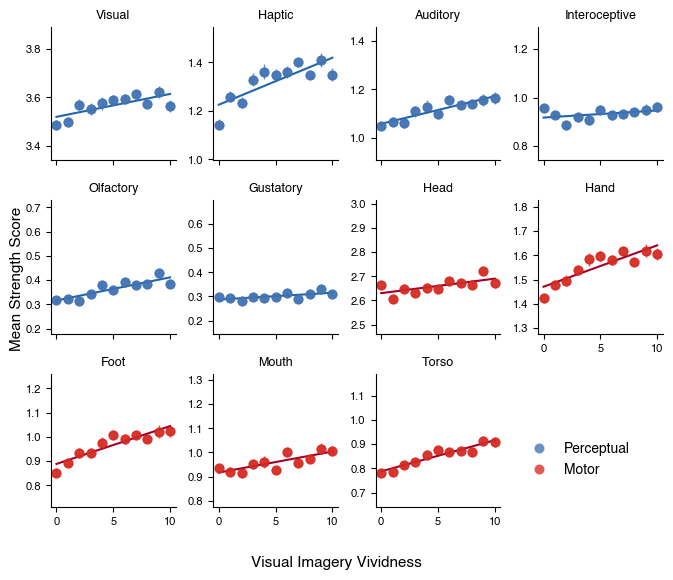

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import os

# Set Helvetica font
plt.rcParams['font.family'] = 'Helvetica'

# === PREPARE SENSORY DATA ===
df_sensory_long = df.melt(
    id_vars="visual_vividness",
    value_vars=sensory_dims,
    var_name="dimension",
    value_name="strength_score"
)

# Clean up sensory dimension names
sensory_labels = {
    "visual_strength": "Visual",
    "auditory_strength": "Auditory",
    "gustatory_strength": "Gustatory",
    "haptic_strength": "Haptic",
    "olfactory_strength": "Olfactory",
    "interoceptive_strength": "Interoceptive"
}
df_sensory_long["dimension"] = df_sensory_long["dimension"].map(sensory_labels)
df_sensory_long["dimension_type"] = "Sensory"

# === PREPARE MOTOR DATA ===
df_motor_long = df.melt(
    id_vars="visual_vividness",
    value_vars=motor_dims,
    var_name="dimension",
    value_name="strength_score"
)

# Clean up motor dimension names
motor_labels = {
    "head_strength": "Head",
    "hand_strength": "Hand",
    "foot_strength": "Foot",
    "mouth_strength": "Mouth",
    "torso_strength": "Torso"
}
df_motor_long["dimension"] = df_motor_long["dimension"].map(motor_labels)
df_motor_long["dimension_type"] = "Motor"

# === COMBINE DATA ===
df_combined_long = pd.concat([df_sensory_long, df_motor_long], ignore_index=True)

# Compute summary stats
df_combined_summary = (
    df_combined_long
    .groupby(["visual_vividness", "dimension", "dimension_type"], as_index=False)
    .agg(
        mean_strength=("strength_score", "mean"),
        se_strength=("strength_score", lambda x: np.std(x, ddof=1) / np.sqrt(len(x)))
    )
)

# Compute y_min and y_max manually
y_limits_combined = (
    df_combined_summary
    .groupby("dimension", as_index=False)
    .apply(lambda g: pd.Series({
        "y_min": (g["mean_strength"] - g["se_strength"]).min() - 0.1,
        "y_max": (g["mean_strength"] - g["se_strength"]).min() + 0.4
    }))
    .reset_index(drop=True)
)

# Merge limits back in
df_combined_summary = df_combined_summary.merge(y_limits_combined, on="dimension", how="left")

# Define desired order - sensory first, then motor
ordered_dimensions = ["Visual", "Haptic", "Auditory", "Interoceptive", "Olfactory", "Gustatory",
                     "Head", "Hand", "Foot", "Mouth", "Torso"]
cat_dimension_type = CategoricalDtype(categories=ordered_dimensions, ordered=True)
df_combined_summary["dimension"] = df_combined_summary["dimension"].astype(cat_dimension_type)

# === PLOT === Combined sensory and motor
g = sns.FacetGrid(
    df_combined_summary,
    col="dimension",
    col_wrap=4,  # 4 columns to accommodate 11 dimensions
    sharey=False,
    height=2.0,  # Slightly smaller for more dimensions
    aspect=0.85
)

# Add invisible points to force axis limits
g.map_dataframe(lambda data, color: plt.scatter(data["visual_vividness"], data["y_min"], alpha=0))
g.map_dataframe(lambda data, color: plt.scatter(data["visual_vividness"], data["y_max"], alpha=0))

# Color mapping based on dimension type
def plot_points_with_colors(data, **kwargs):
    sensory_mask = data["dimension_type"] == "Sensory"
    motor_mask = data["dimension_type"] == "Motor"
    
    if sensory_mask.any():
        plt.scatter(data[sensory_mask]["visual_vividness"], 
                   data[sensory_mask]["mean_strength"],
                   color="#4575b4", s=40, alpha=0.8)
    if motor_mask.any():
        plt.scatter(data[motor_mask]["visual_vividness"], 
                   data[motor_mask]["mean_strength"],
                   color="#d73027", s=40, alpha=0.8)

g.map_dataframe(plot_points_with_colors)

# Add custom error bars and regression lines
for ax, (name, subdata) in zip(g.axes.flat, df_combined_summary.groupby("dimension")):
    # Determine color based on dimension type
    if subdata["dimension_type"].iloc[0] == "Sensory":
        point_color = "#4575b4"
        line_color = "#2166ac"
    else:  # Motor
        point_color = "#d73027"
        line_color = "#a50026"
    
    # Add error bars
    for _, row in subdata.iterrows():
        ax.errorbar(
            x=row["visual_vividness"],
            y=row["mean_strength"],
            yerr=row["se_strength"],
            fmt='o',
            color=point_color,
            alpha=0.8,
            capsize=0,
            capthick=1,
            elinewidth=1
        )
    
    # Fit and plot regression line
    x = subdata["visual_vividness"]
    y = subdata["mean_strength"]
    if len(x.unique()) > 1:
        coeffs = np.polyfit(x, y, 1)
        x_vals = np.linspace(x.min(), x.max(), 100)
        y_vals = np.polyval(coeffs, x_vals)
        ax.plot(x_vals, y_vals, color=line_color, linewidth=1.5)
    
    # Clean up spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Styling with paper-appropriate font sizes
g.set_titles(col_template="{col_name}", size=9)  # Smaller titles for more panels
g.set_xlabels("")  # remove per-facet x labels
g.set_ylabels("")  # remove per-facet y labels

# Shared axis labels
g.fig.text(0.5, 0.02, "Visual Imagery Vividness", ha='center', fontsize=11)
g.fig.text(0.02, 0.5, "Mean Strength Score", va='center', rotation='vertical', fontsize=11)

# Format ticks with smaller font
for ax in g.axes.flat:
    ax.tick_params(labelsize=8)
    ax.grid(False)

# Layout adjusted for paper format
plt.subplots_adjust(top=0.92, bottom=0.12, left=0.08, right=0.98, hspace=0.3, wspace=0.3)
g.fig.suptitle("")

# Add legend in the empty space (bottom right)
# Create custom legend elements
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='#4575b4', 
           markersize=8, label='Perceptual', alpha=0.8),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='#d73027', 
           markersize=8, label='Motor', alpha=0.8)
]

# Add legend to the figure in the empty space (bottom right area)
g.fig.legend(handles=legend_elements, loc='lower right', 
            bbox_to_anchor=(0.95, 0.15), fontsize=10, frameon=False)

# Create the plots_paper directory if it doesn't exist
os.makedirs('plots_paper', exist_ok=True)

# Save the plot in high resolution suitable for publication
plt.savefig('plots_paper/combined_dimensions_plot.png', 
           dpi=300, 
           bbox_inches='tight', 
           facecolor='white',
           edgecolor='none')

# Optionally save as PDF for vector graphics
plt.savefig('plots_paper/combined_dimensions_plot.pdf', 
           bbox_inches='tight', 
           facecolor='white',
           edgecolor='none')

plt.show()